In [4]:
import pandas as pd
import os
from PIL import Image
import dlib

In [5]:
data_path = '../data/raw/'
image_dir = os.path.join(data_path, 'fairface_pad125')

In [6]:
train_csv = pd.read_csv(os.path.join(data_path, 'fairface_label_train.csv'))

In [7]:
img_path = os.path.join(image_dir, train_csv.iloc[1, 0])
image = Image.open(img_path)

In [40]:

def rect_to_bb(rect):
	# take a bounding predicted by dlib and convert it
	# to the format (x, y, w, h) as we would normally do
	# with OpenCV
	x = rect.left()
	y = rect.top()
	w = rect.right() - x
	h = rect.bottom() - y
	# return a tuple of (x, y, w, h)
	return (x, y, w, h)

def detect_face(image_path, default_max_size=800,size = 300, padding = 0.25):
    cnn_face_detector = dlib.cnn_face_detection_model_v1('../models/mmod_human_face_detector.dat')
    sp = dlib.shape_predictor('../models/shape_predictor_5_face_landmarks.dat')
    base = 2000  # largest width and height
    img = dlib.load_rgb_image(image_path)
    old_height, old_width, _ = img.shape
    old_height, old_width, _ = img.shape

    if old_width > old_height:
        new_width, new_height = default_max_size, int(default_max_size * old_height / old_width)
    else:
        new_width, new_height =  int(default_max_size * old_width / old_height), default_max_size
    img = dlib.resize_image(img, rows=new_height, cols=new_width)
    dets = cnn_face_detector(img, 1)
    num_faces = len(dets)
    if num_faces == 0:
        print("Sorry, there were no faces found in '{}'".format(image_path))
        return
    elif num_faces > 1:
        print("Multiple face in '{}'. A random face will be returned".format(image_path))
    faces = dlib.full_object_detections()
    for detection in dets:
        rect = detection.rect
        faces.append(sp(img, rect))
    images = dlib.get_face_chips(img, faces, size=size, padding = padding)    
    return images[0]

In [44]:
cropped = detect_face(img_path)

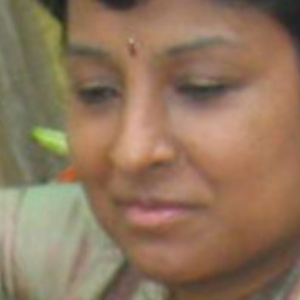

In [43]:
Image.fromarray(cropped, 'RGB')